<a href="https://colab.research.google.com/github/Python-Financial-Analyst/pyfian_dev/blob/main/notebooks/fixed_income/03_curves.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

# Curves

A bond yield curve represents the yields of bonds with different maturities, providing insight into how investors value short-term versus long-term debt. The shape of the curve is closely tied to macroeconomic conditions and market expectations.
For instance, an upward-sloping yield curve often signals economic growth: investors prefer short-term bonds (or cash equivalents) to fund projects and investments, pushing up short-term demand and yields. Conversely, an inverted yield curve may indicate economic uncertainty or a potential slowdown, as investors seek the safety of longer-term bonds, driving their yields lower relative to short-term bonds.
Different types of curves—such as spot curves, forward curves, and par curves—highlight various aspects of bond pricing and interest rate expectations. By analyzing these curves, investors and policymakers gain valuable insights into market sentiment and the broader economic outlook. Here are some examples of curves we can look at:

- **Credit Spread**: Difference in yield between bonds of similar maturity but different credit quality, typically corporate vs. Treasury.  

- **Forward Curve**: Shows forward rates, implied future interest rates for specific periods. 

- **Interpolated Curve**: Yields estimated between observed maturities using interpolation.  

- **Par Curve**: Coupon rates for bonds priced at par value across maturities.  

- **Spot Curve**: Yields on zero-coupon bonds for different maturities.  

## Curve Shapes

### Flat Curve

A flat yield curve occurs when short-term and long-term bond yields are nearly the same. This shape suggests uncertainty in the economy: investors do not strongly prefer one maturity over another, and the market is signaling that future growth and inflation expectations are unclear. Flat curves often appear during transitions in the business cycle, such as when the economy is shifting from expansion to slowdown.

0.06288444424296233


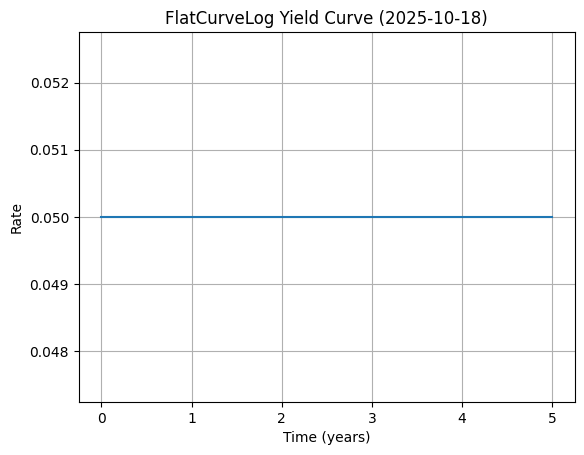

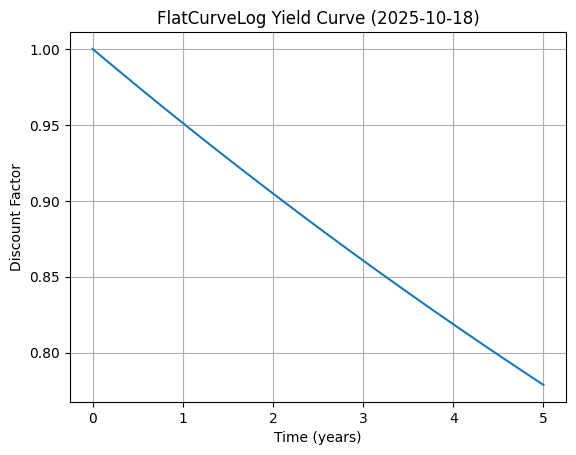

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyfian.yield_curves.spot_curve import SpotCurve
from pyfian.fixed_income.fixed_rate_bond import FixedRateBullet
from pyfian.yield_curves.flat_curve import FlatCurveLog

bonds = [
    FixedRateBullet(
        issue_dt="2025-01-01",
        maturity=maturity,
        cpn=5,
        cpn_freq=2,
        notional=100,
        settlement_date="2025-10-18",
        price=100,
    )
    for maturity in ["2026-01-01", "2027-01-01", "2028-01-01", "2029-01-01"]
]


flat_curve = FlatCurveLog(log_rate=0.05, curve_date="2025-10-18")
flat_curve.plot_curve(t_max=5, n=1000, kind="rate")
flat_curve.plot_curve(t_max=5, n=1000, kind="discount")

### Upward Sloping Curve

An upward-sloping yield curve is the most common shape, where long-term bonds offer higher yields than short-term bonds. This reflects expectations of economic growth and potentially higher inflation in the future, leading investors to demand greater compensation for holding debt over longer horizons. It signals confidence in the economy, as short-term borrowing costs remain relatively low while long-term rates rise with stronger growth outlooks.

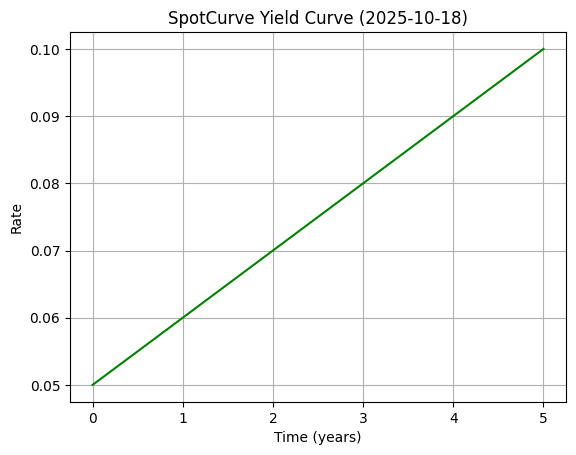

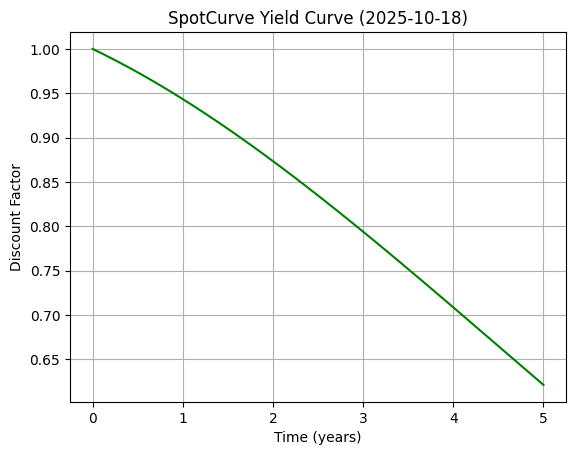

In [9]:
# Define spot rates by time-to-maturity (in years)
upward_sloping_curve = SpotCurve(
    curve_date="2025-10-18",
    zero_rates={
        0.0: 0.05,
        1.0: 0.06,
        2.0: 0.07,
        3.0: 0.08,
        4.0: 0.09,
        5.0: 0.10,
    },
)

# Plot yield curve
upward_sloping_curve.plot_curve(
    t_max=5, n=1000, kind="rate", label="Upward-Sloping Yield Curve", color="green"
)


# Plot yield curve
upward_sloping_curve.plot_curve(
    t_max=5, n=1000, kind="discount", label="Upward-Sloping Yield Curve", color="green"
)

### Inverted Yield Curve
An inverted yield curve occurs when short-term bond yields are higher than long-term yields. This unusual shape often signals investor concern about the economy, as demand for long-term bonds increases to lock in safer, stable returns. Inverted curves are commonly viewed as a warning of potential economic slowdown or recession, reflecting expectations of lower growth and inflation in the future.

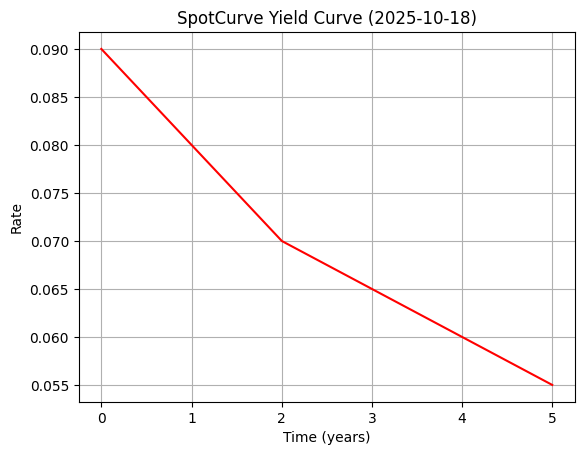

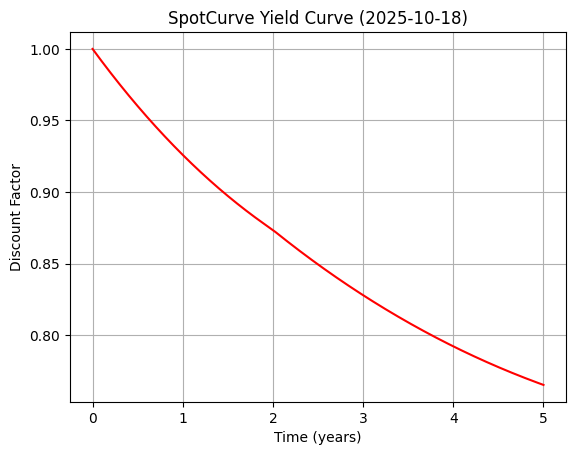

In [10]:
from pyfian.yield_curves.spot_curve import SpotCurve

# Define a downward-sloping (inverted) spot curve by time-to-maturity (in years)
downward_sloping_curve = SpotCurve(
    curve_date="2025-10-18",
    zero_rates={
        0.0: 0.09,  # Short-term (high)
        1.0: 0.08,
        2.0: 0.07,
        3.0: 0.065,
        4.0: 0.06,
        5.0: 0.055,  # Long-term (low)
    },
)

# Plot yield (spot rate) curve
downward_sloping_curve.plot_curve(
    t_max=5, n=1000, kind="rate", label="Downward-Sloping Yield Curve", color="red"
)

# Plot discount factor curve
downward_sloping_curve.plot_curve(
    t_max=5,
    n=1000,
    kind="discount",
    label="Downward-Sloping Discount Curve",
    color="red",
)

## Central Banks and Interest Rates: Managing Demand Shocks

Interest rates are primarily determined by market forces, but central banks, such as the Federal Reserve, play a crucial role in influencing them to stabilize the economy during macroeconomic shocks. Their primary goals are to maintain stable inflation and employment, guided by the economy's position relative to its full potential output, as represented by the long-run aggregate supply (LRAS) curve.

### Aggregate Demand and Supply Framework
The aggregate demand (AD) curve illustrates the relationship between the price level and total output demanded, sloping downward as lower prices boost demand. The short-run aggregate supply (SRAS) curve shows the output supplied at various price levels, sloping upward due to higher prices incentivizing production. The LRAS curve is vertical, marking the economy's full potential output, where resources are fully utilized.
Responding to Demand Shocks
Central banks adjust interest rates to counteract demand shocks, which shift the AD curve and affect output and prices:
- **Negative Demand Shock** : A decrease in demand (e.g., reduced consumer spending) shifts the AD curve left, lowering output and prices. If the economy operates below its full potential (to the left of LRAS), the central bank may lower interest rates. This stimulates demand, shifting AD rightward to restore output without causing excessive inflation.
- **Positive Demand Shock**: An increase in demand (e.g., excessive spending) shifts the AD curve right, raising output and prices. If output exceeds full potential (to the right of LRAS), inflation accelerates. The central bank may raise interest rates to reduce demand, shifting AD leftward to control inflation.

### Balancing Inflation and Employment
Central banks aim to keep the economy near its full potential output:

When output is below potential, lowering interest rates encourages borrowing and spending, boosting AD to close the output gap.
When output exceeds potential, raising interest rates discourages spending, reducing AD to prevent overheating and runaway inflation.

This dynamic interplay is effectively visualized using the AD-AS model, which demonstrates how interest rate adjustments stabilize output and prices in response to demand shocks.

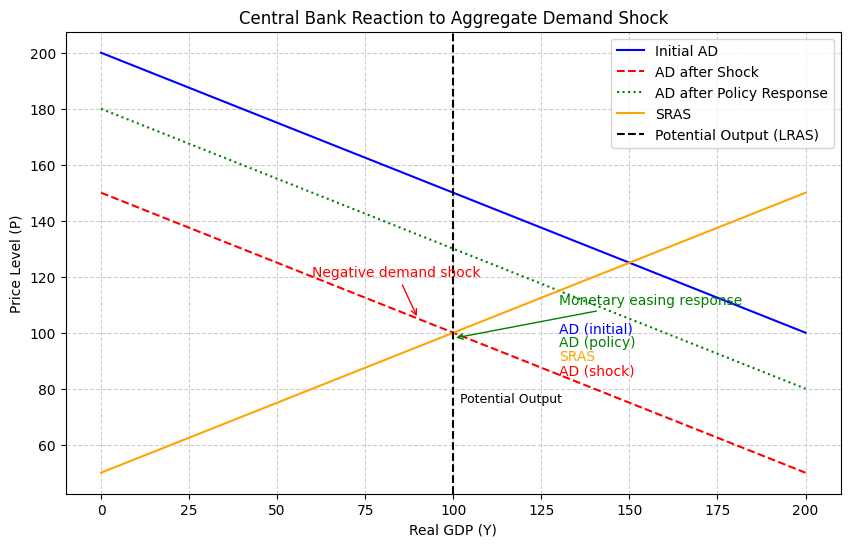

In [17]:
# Create range for output (GDP)
Y = np.linspace(0, 200, 200)

# Define functions for curves
# SRAS (upward sloping)
SRAS = 0.5 * Y + 50

# LRAS (vertical at potential output)
Y_potential = 100

# AD curves
AD_initial = 200 - 0.5 * Y  # initial AD
AD_shock = 150 - 0.5 * Y  # demand shock (leftward shift)
AD_policy = 180 - 0.5 * Y  # policy response (partial recovery)

# Plot setup
plt.figure(figsize=(10, 6))

# Plot curves
plt.plot(Y, AD_initial, label="Initial AD", color="blue")
plt.plot(Y, AD_shock, label="AD after Shock", color="red", linestyle="--")
plt.plot(Y, AD_policy, label="AD after Policy Response", color="green", linestyle=":")

plt.plot(Y, SRAS, label="SRAS", color="orange")
plt.axvline(
    x=Y_potential, color="black", linestyle="--", label="Potential Output (LRAS)"
)

# Labels and legend
plt.title("Central Bank Reaction to Aggregate Demand Shock")
plt.xlabel("Real GDP (Y)")
plt.ylabel("Price Level (P)")
plt.legend()

# Annotate key points
plt.text(102, 75, "Potential Output", fontsize=9)
plt.text(130, 90, "SRAS", color="orange")
plt.text(130, 100, "AD (initial)", color="blue")
plt.text(130, 85, "AD (shock)", color="red")
plt.text(130, 95, "AD (policy)", color="green")

# Add explanatory arrows
plt.annotate(
    "Negative demand shock",
    xy=(90, 105),
    xytext=(60, 120),
    arrowprops=dict(arrowstyle="->", color="red"),
    color="red",
)

plt.annotate(
    "Monetary easing response",
    xy=(100, 98),
    xytext=(130, 110),
    arrowprops=dict(arrowstyle="->", color="green"),
    color="green",
)

# Show grid and chart
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()